# Amazon Forest Fires

**Author**: Matthew Stewart<br/>

In this notebook we analyze forest fire data from 1998-2017. This is data collected by the Brazilian Government from the [Sistema Nacional de Informações Florestais](http://dados.gov.br/dataset/sistema-nacional-de-informacoes-florestais-snif). The purpose of this notebook is exploratory data analysis that is used to complement the discussion in my Medium article "[An Analysis of the Amazon Wildfires](https://medium.com/@matthew_stewart/an-analysis-of-amazonian-forest-fires-8facca63ba69)".

<hr style="height:2pt">

In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set Latex Output (Comment out if errors occur)
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [3]:
data = pd.read_csv('amazon.csv',encoding="ISO-8859-1")
data.head()

year state    month  number        date
0  1998  Acre  Janeiro     0.0  1998-01-01
1  1999  Acre  Janeiro     0.0  1999-01-01
2  2000  Acre  Janeiro     0.0  2000-01-01
3  2001  Acre  Janeiro     0.0  2001-01-01
4  2002  Acre  Janeiro     0.0  2002-01-01

In [4]:
fig = go.Figure()
for i in data['state'].unique():
    datas = data[data['state']==i][['date','state','number']].groupby(['date','state']).mean().reset_index()
    fig.add_trace(go.Scatter(x=datas['date'], y=datas['number'], name=i,
                        line_shape='linear'))
fig.show()

In [21]:
state_dict = {'Amapa':'Amapá', 'Ceara':'Ceará', 'Goias':'Goiás', 
 'Maranhao': 'Maranhão', 'Paraiba':'Paraíba', 
 'Piau':'Piauí', 'Rio':'Rio de Janeiro', 'Rondonia':'Rondônia', 'Sao Paulo':'São Paulo'}
data['state'].replace(state_dict, inplace=True)

In [45]:
# cm = plt.get_cmap('Reds')
# plt.figure(figsize=(10,1))
# for i in np.arange(250):
#     plt.scatter(i,0, c=cm(i), s=1000);
#     frame1 = plt.gca()
#     frame1.axes.get_yaxis().set_visible(False)

In [66]:
def map_fires(year, ax):
    data_years = data[data['year']==year][['state','number']].groupby(['state']).mean().reset_index()
    cm = plt.get_cmap('Reds')
    sns.set(style="white",font_scale=1.5)

    map = Basemap(projection='mill',llcrnrlat=-35,urcrnrlat=10,\
                llcrnrlon=-80,urcrnrlon=-30,resolution='c')
    map.drawparallels(np.arange(-90,91.,30.))
    map.drawmeridians(np.arange(-90,90.,60.))
    map.drawmapboundary(fill_color='aqua')
    map.fillcontinents(color='#ddaa66',lake_color='aqua', alpha=1)
    map.drawcoastlines()

    map.readshapefile('gadm36_BRA_1', 'comarques', drawbounds=True)

    for state in data_years['state'].unique():
        patches   = []
        for info, shape in zip(map.comarques_info, map.comarques):
            if info['NAME_1'] == state:
                patches.append( Polygon(np.array(shape), True) )
        ax.add_collection(PatchCollection(patches,facecolor=cm(int(data_years[data_years['state']==state]['number'].iloc[0])),
                                          linewidths=1., zorder=4)) 

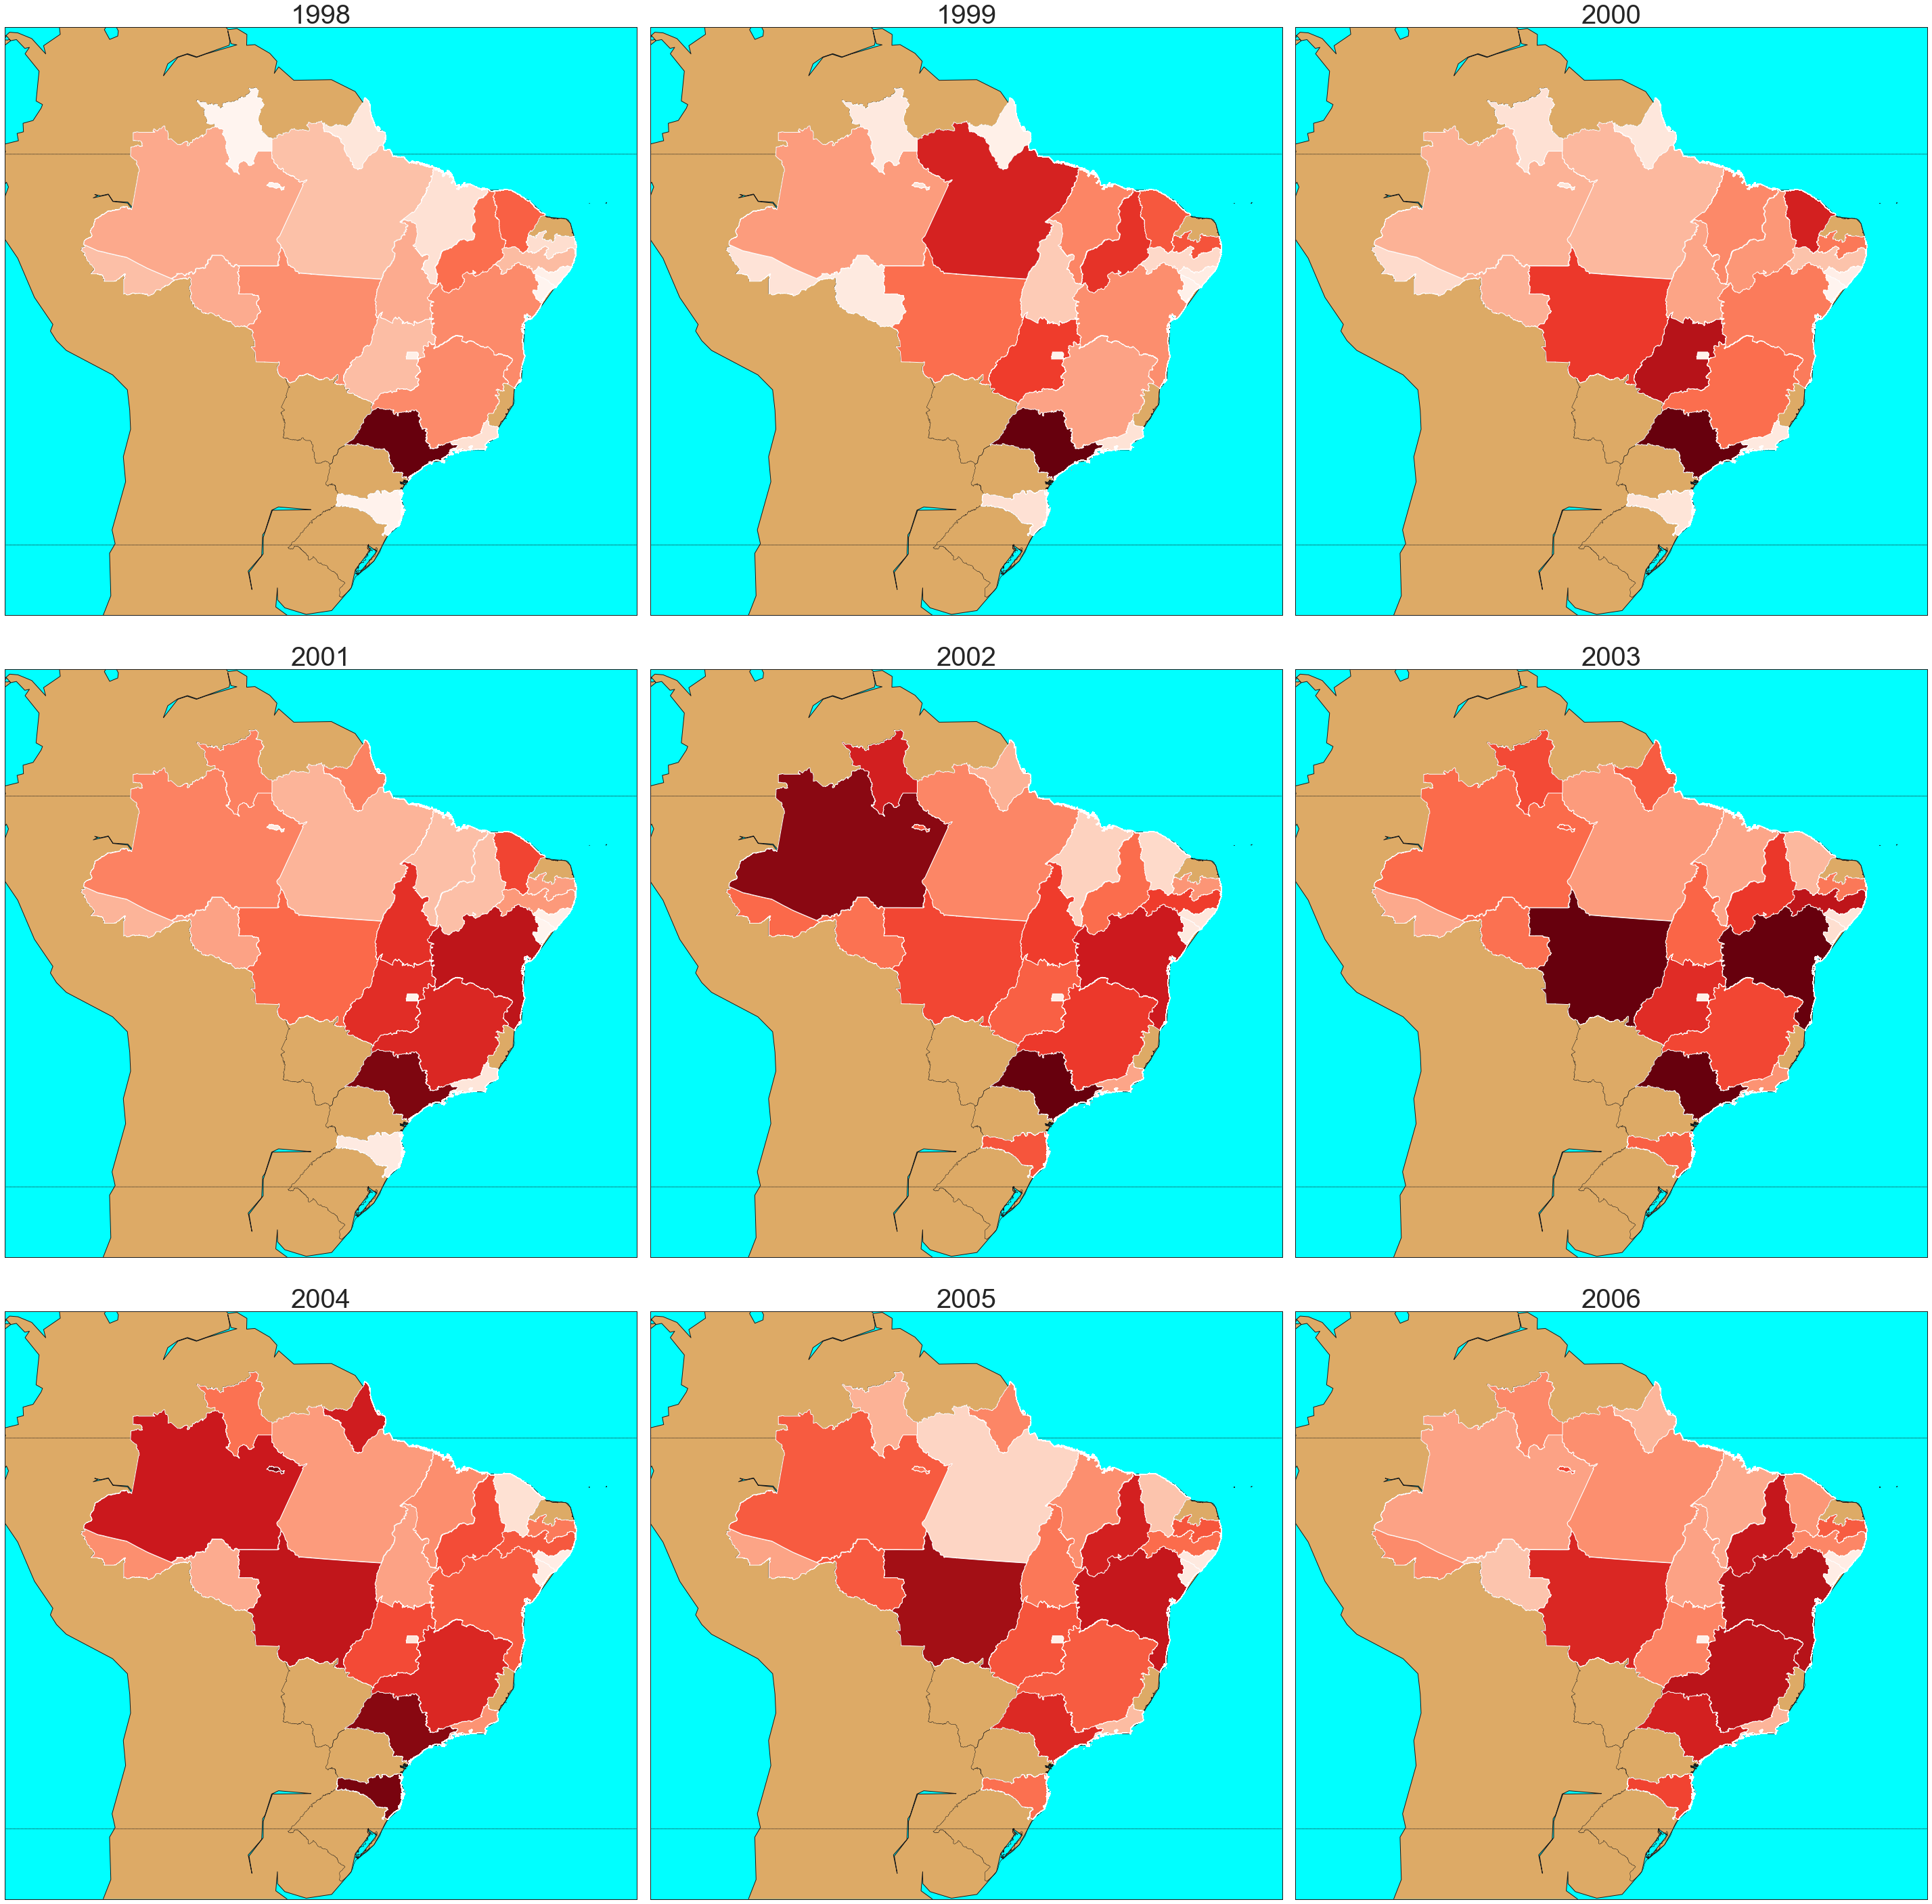

In [67]:
fig = plt.figure(figsize=(40,40))
for i,year in enumerate([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006]):
    ax1 = fig.add_subplot(3,3,i+1)
    ax1.set_title(year, fontsize=40)
    map_fires(year, ax1)
plt.tight_layout()

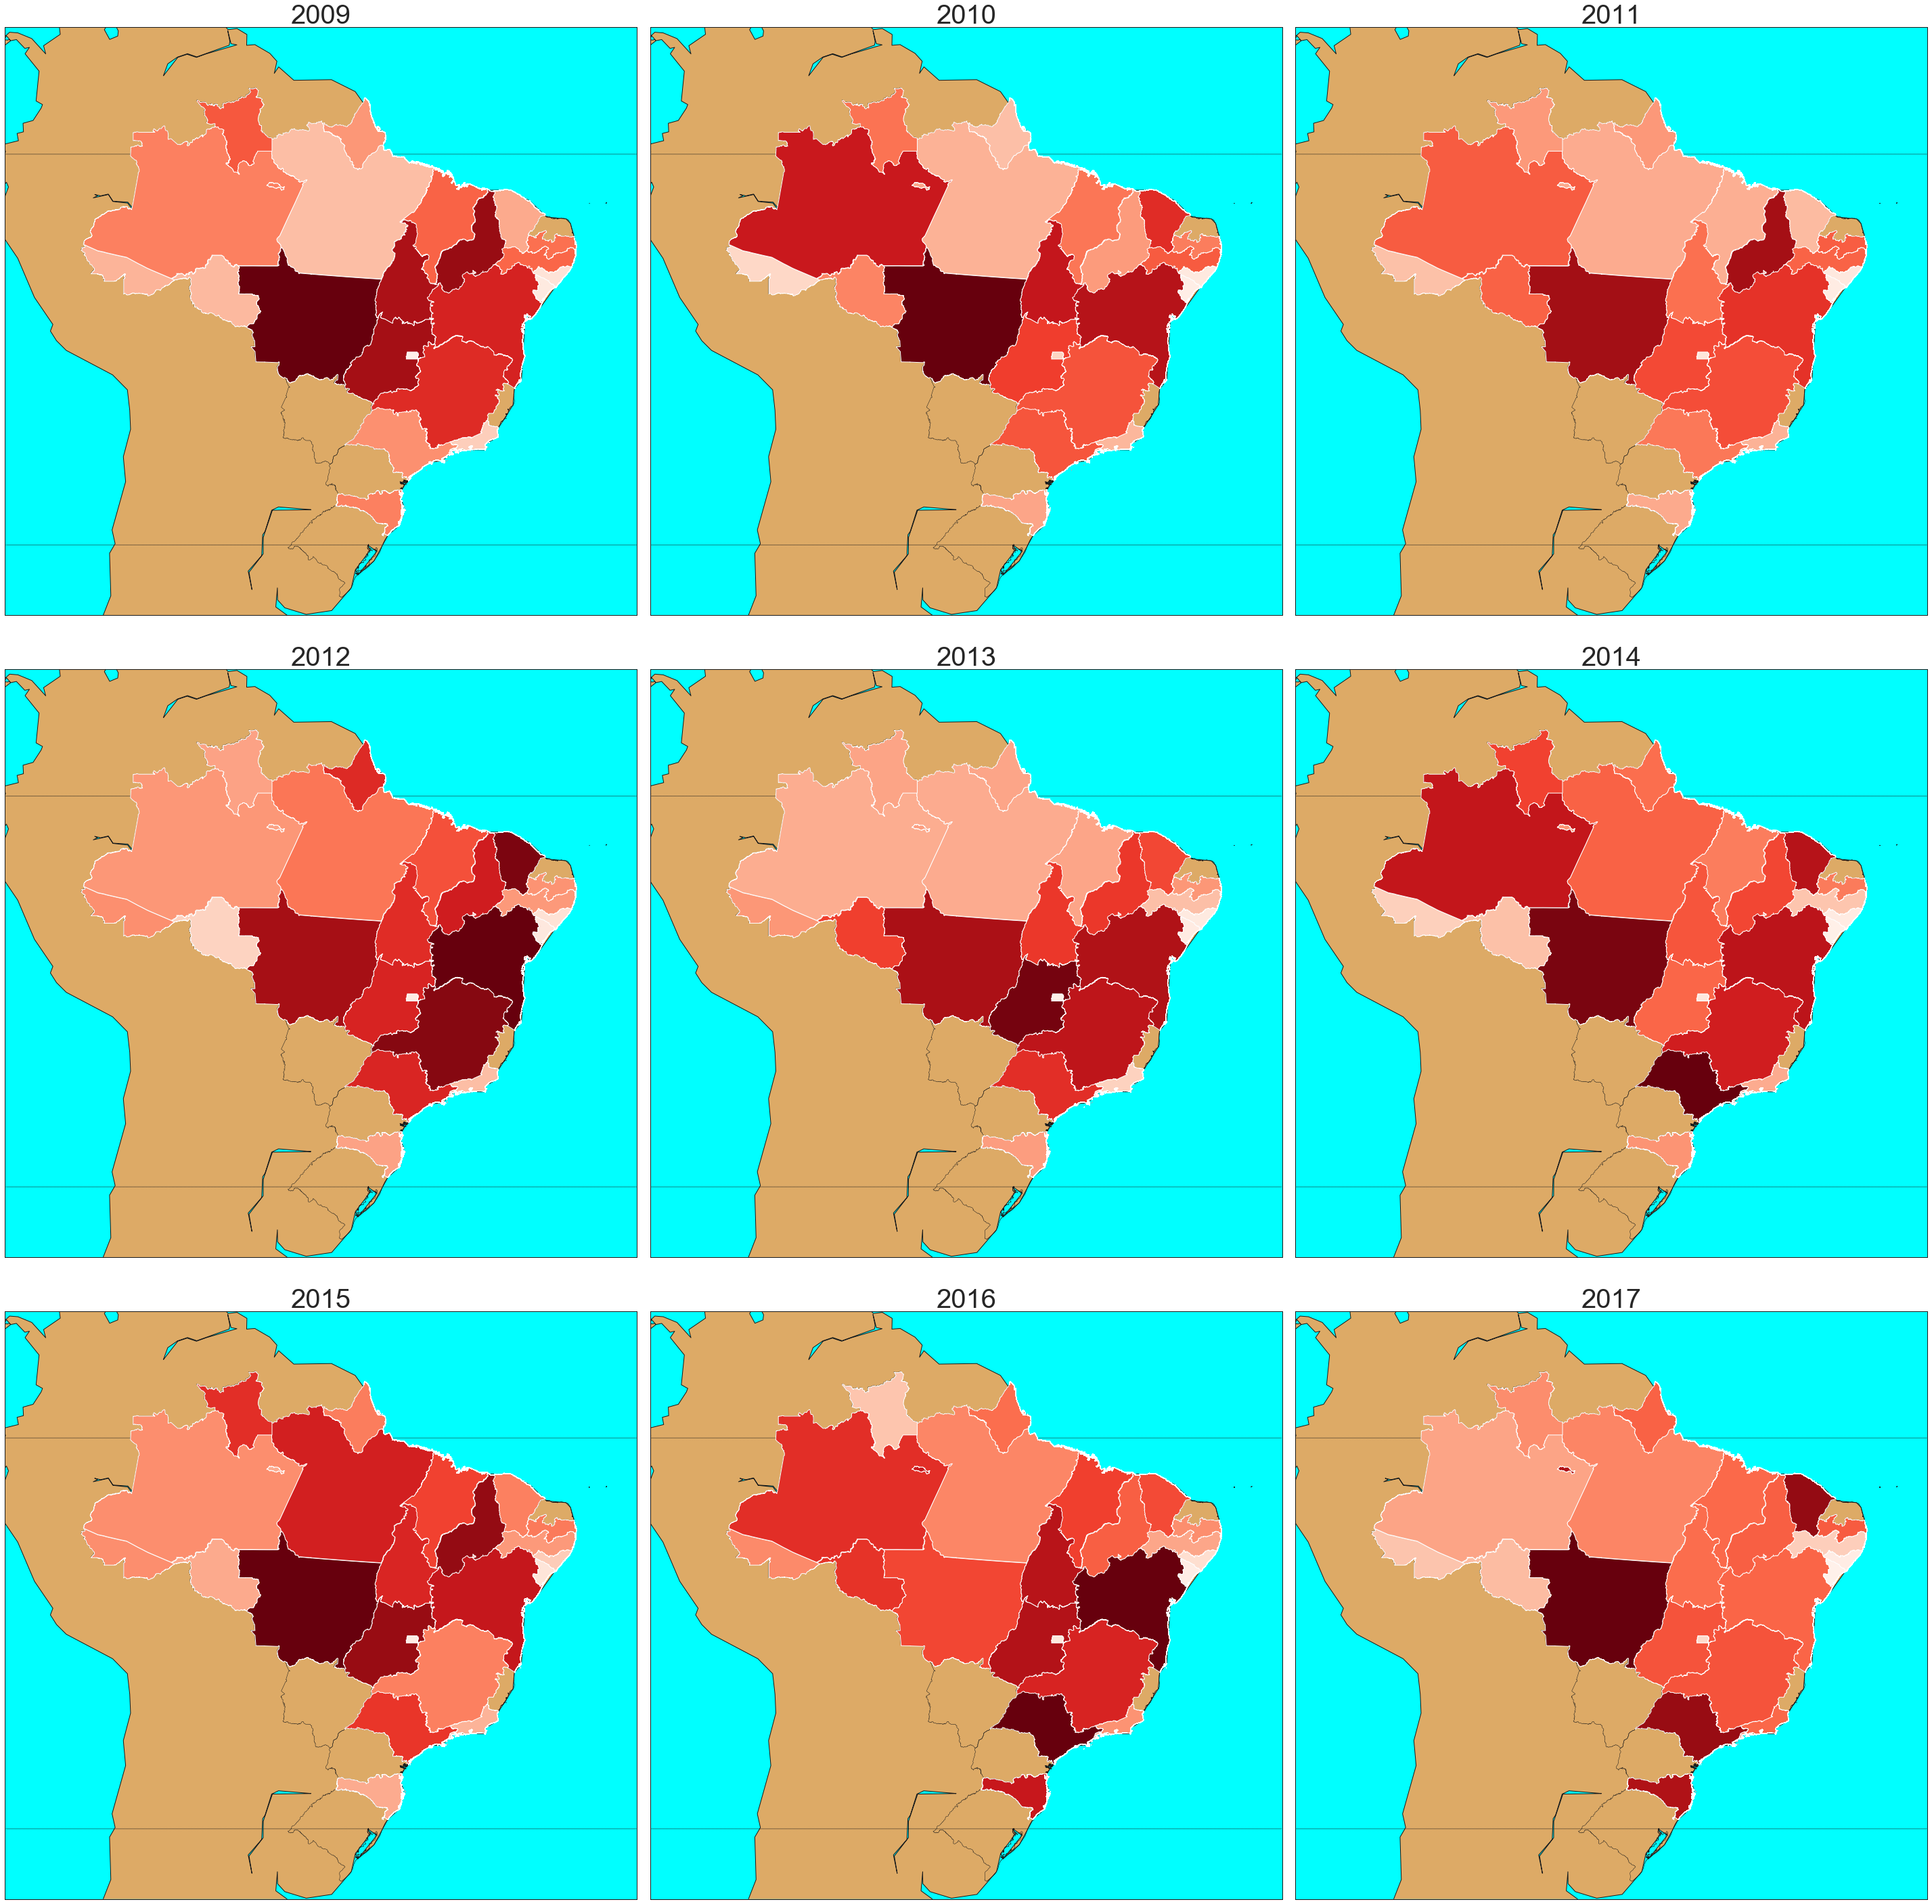

In [68]:
fig = plt.figure(figsize=(40,40))
for i,year in enumerate([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]):
    ax1 = fig.add_subplot(3,3,i+1)
    ax1.set_title(year, fontsize=40)
    map_fires(year, ax1)
plt.tight_layout()

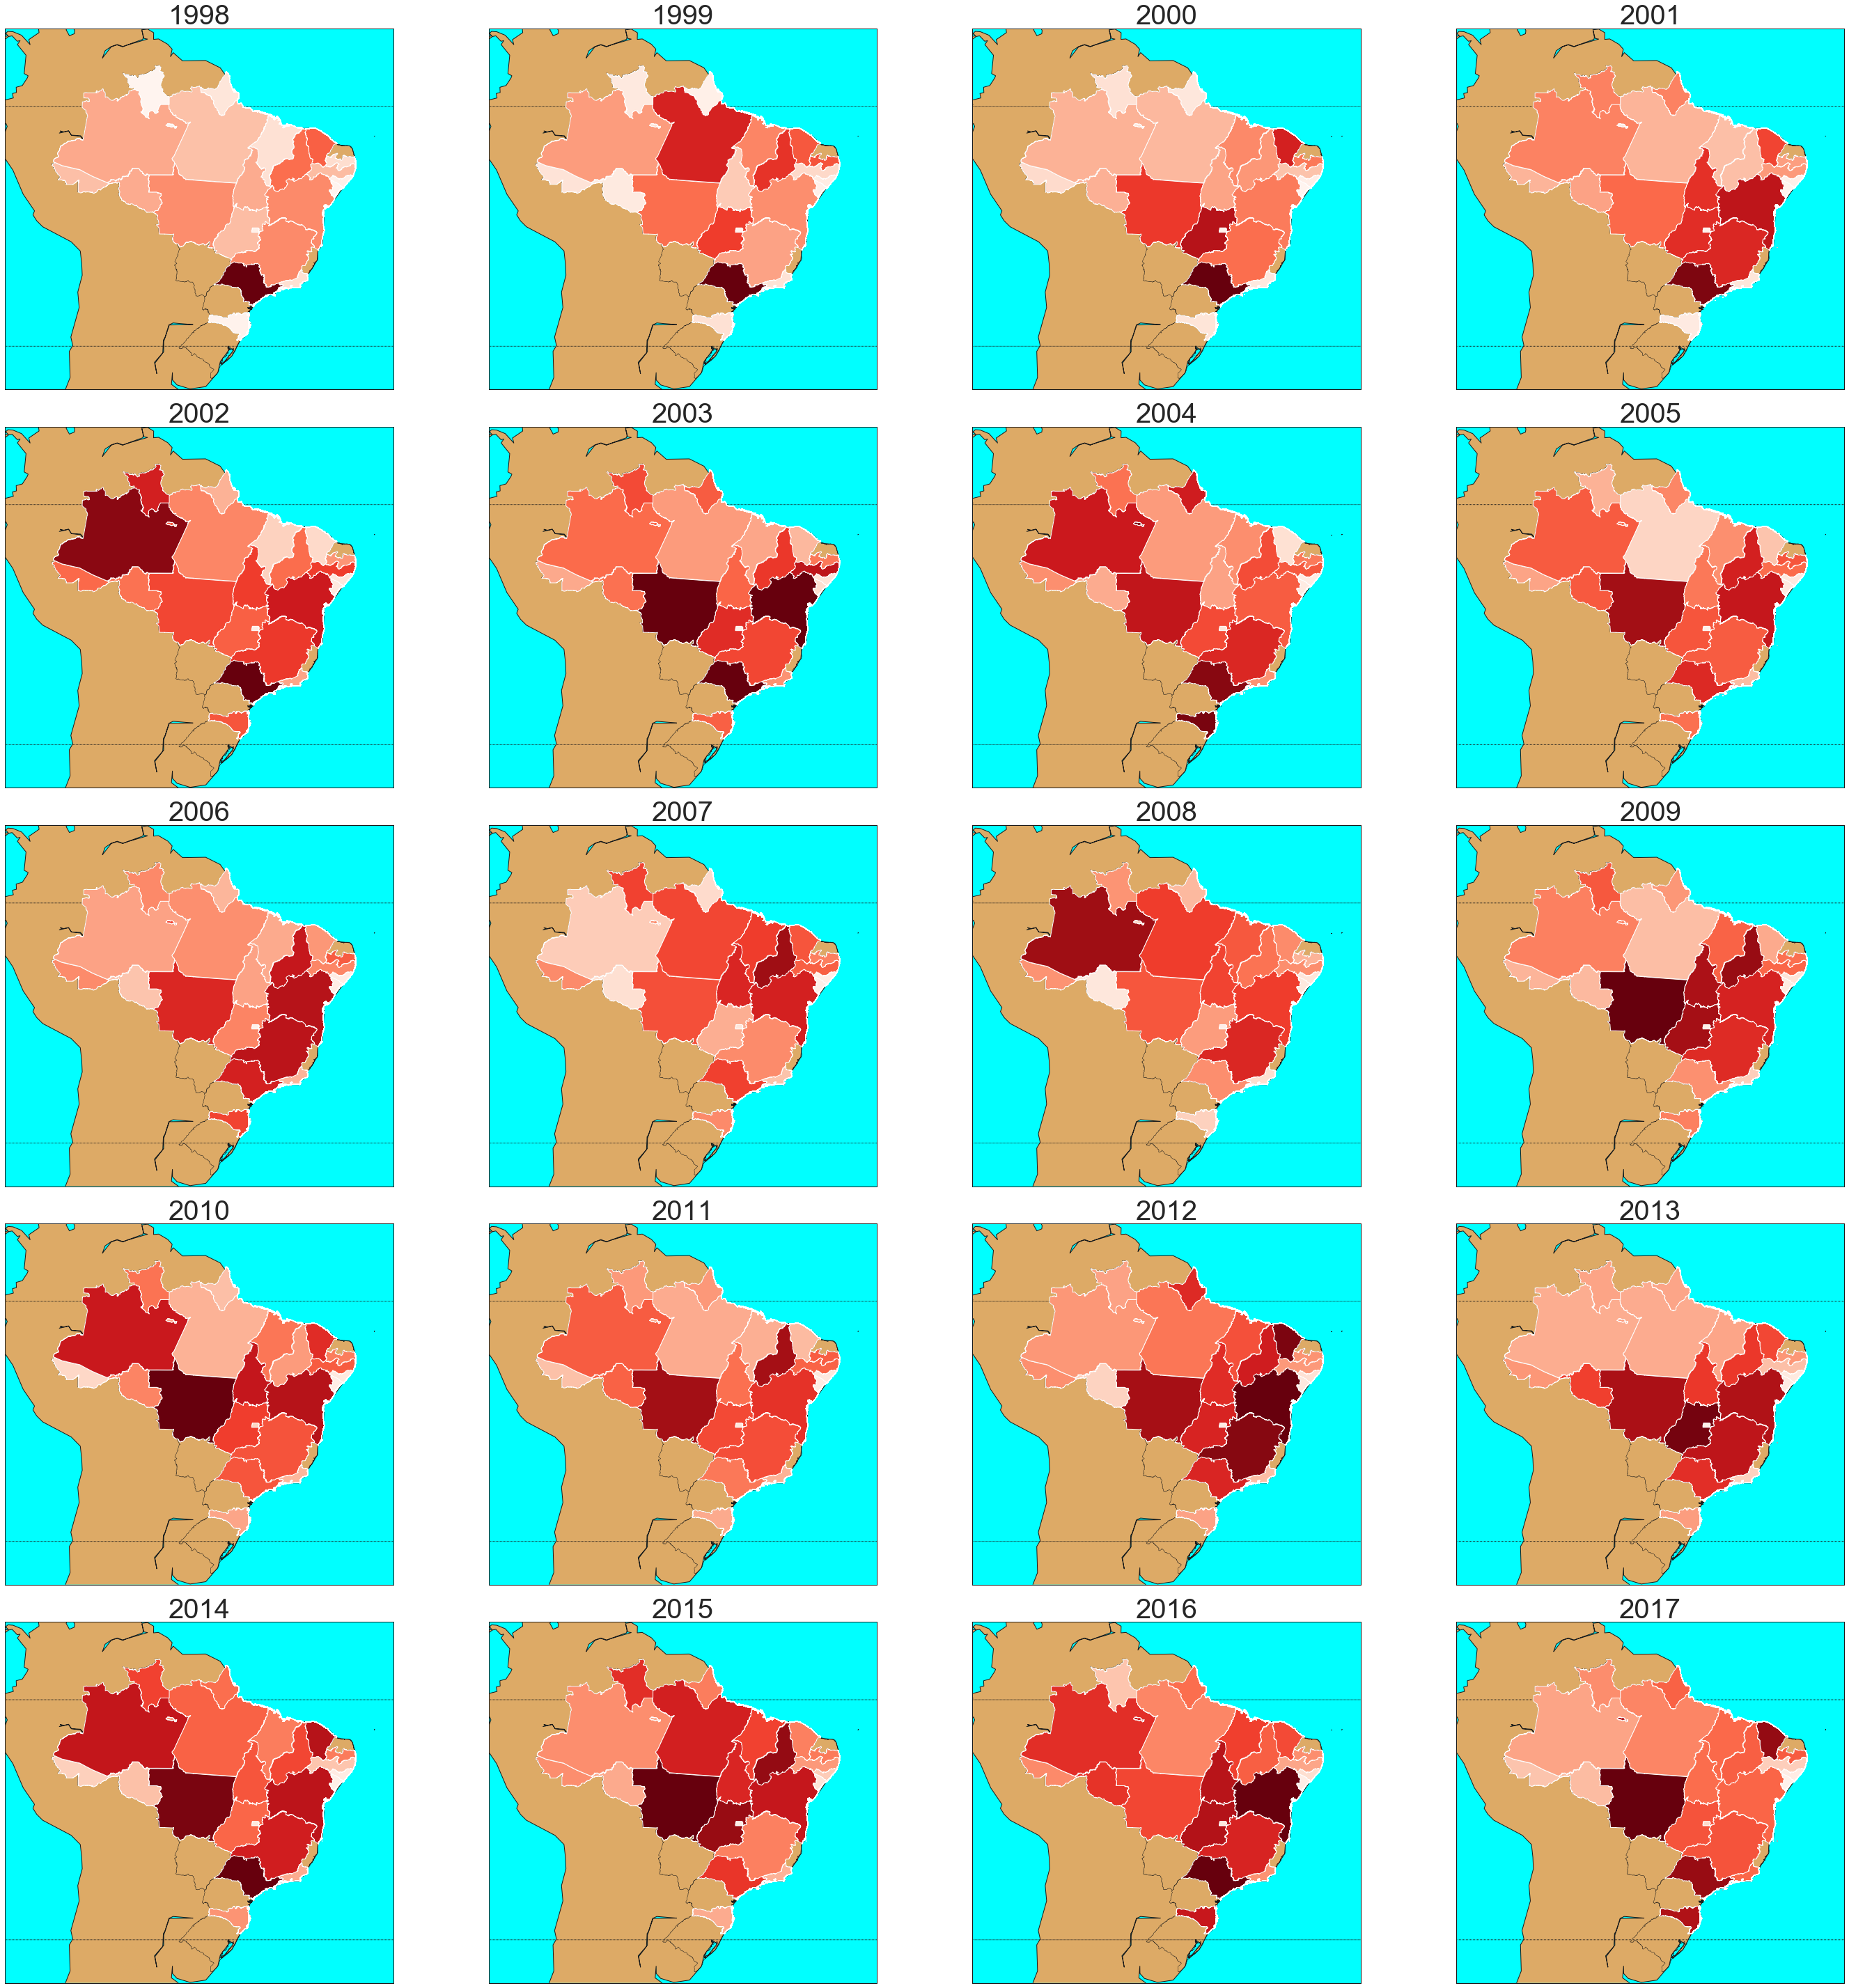

In [72]:
fig = plt.figure(figsize=(40,40))
for i,year in enumerate([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,2007,2008,2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]):
    ax1 = fig.add_subplot(5,4,i+1)
    ax1.set_title(year, fontsize=40)
    map_fires(year, ax1)
    plt.savefig('fire_plot_' + str(year) + '.png')
plt.tight_layout()

In [8]:
import plotly.graph_objects as go

dataset = data

years =  ["1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011",
 "2012", "2013", "2014", "2015", "2016", "2017"]

# make list of states
states = []
for state in dataset["state"]:
    if state not in states:
        states.append(state)
# make figure
fig_dict = {
    "data": [],
    "layout": {},
    "frames": []
}

# fill in most of layout
fig_dict["layout"]["xaxis"] = {"title": "Month"}
fig_dict["layout"]["yaxis"] = {"title": "Fires in Numbers"}
fig_dict["layout"]["hovermode"] = "closest"
fig_dict["layout"]["sliders"] = {
    "args": [
        "transition", {
            "duration": 400,
            "easing": "cubic-in-out"
        }
    ],
    "initialValue": "1998",
    "plotlycommand": "animate",
    "values": years,
    "visible": True
}
fig_dict["layout"]["updatemenus"] = [
    {
        "buttons": [
            {
                "args": [None, {"frame": {"duration": 500, "redraw": False},
                                "fromcurrent": True, "transition": {"duration": 300,
                                                                    "easing": "quadratic-in-out"}}],
                "label": "Play",
                "method": "animate"
            },
            {
                "args": [[None], {"frame": {"duration": 0, "redraw": False},
                                  "mode": "immediate",
                                  "transition": {"duration": 0}}],
                "label": "Pause",
                "method": "animate"
            }
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top"
    }
]

sliders_dict = {
    "active": 0,
    "yanchor": "top",
    "xanchor": "left",
    "currentvalue": {
        "font": {"size": 20},
        "prefix": "Year:",
        "visible": True,
        "xanchor": "right"
    },
    "transition": {"duration": 300, "easing": "cubic-in-out"},
    "pad": {"b": 10, "t": 50},
    "len": 0.9,
    "x": 0.1,
    "y": 0,
    "steps": []
}

# make data
year = 1998
for state in states:
    dataset_by_year = dataset[dataset["year"] == year]
    dataset_by_year_and_cont = dataset_by_year[
        dataset_by_year["state"] == state]

    data_dict = {
        "x": list(dataset_by_year_and_cont["month"]),
        "y": list(dataset_by_year_and_cont["number"]),
        "mode": "markers",
        "text": list(dataset_by_year_and_cont["state"]),
        "marker": {
            "sizemode": "area",
            "sizeref": 2,
            "size": list(dataset_by_year_and_cont["number"]
            )
        },
        "name": state
    }
    fig_dict["data"].append(data_dict)

# make frames
for year in years:
    frame = {"data": [], "name": str(year)}
    for state in states:
        dataset_by_year = dataset[dataset["year"] == int(year)]
        dataset_by_year_and_cont = dataset_by_year[
            dataset_by_year["state"] == state]

        data_dict = {
            "x": list(dataset_by_year_and_cont["month"]),
            "y": list(dataset_by_year_and_cont["number"]),
            "mode": "markers",
            "text": list(dataset_by_year_and_cont["state"]),
            "marker": {
                "sizemode": "area",
                "sizeref": 2,
            "size": list(dataset_by_year_and_cont["number"]
                )
            },
            "name": state
        }
        frame["data"].append(data_dict)

    fig_dict["frames"].append(frame)
    slider_step = {"args": [
        [year],
        {"frame": {"duration": 300, "redraw": False},
         "mode": "immediate",
         "transition": {"duration": 400}}
    ],
        "label": year,
        "method": "animate"}
    sliders_dict["steps"].append(slider_step)


fig_dict["layout"]["sliders"] = [sliders_dict]

fig = go.Figure(fig_dict)

fig.show(width=800, height=1000)

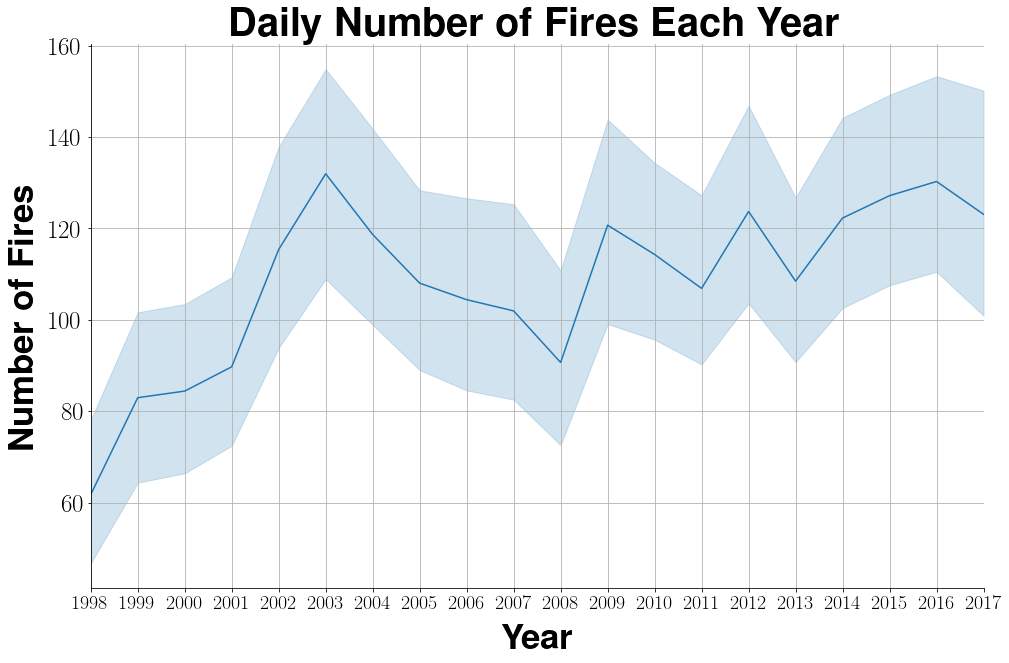

In [10]:
from matplotlib.pyplot import MaxNLocator, FuncFormatter
plt.figure(figsize = (16, 10))
plot = sns.lineplot(data = data, x = 'year', y = 'number', markers = True)
plot.xaxis.set_major_locator(plt.MaxNLocator(19))
plot.set_xlim(1998, 2017)
plt.grid('on')
#plt.plot(df.index[:2196],data["LME Nickel cash USD/t, 5pm UK close"].values,'k', linewidth=1, label='Nickel Price')
plt.title(r'\textbf{Daily Number of Fires Each Year}', fontsize=40)
plt.xlabel(r'\textbf{Year}', fontsize=35,labelpad=10)
plt.xticks(size=20)
plt.yticks(size=25)
plt.ylabel(r'\textbf{Number of Fires}', fontsize=35,labelpad=10)
#plt.legend(fontsize='large', loc='best', fancybox=True, shadow=True)
sns.despine();

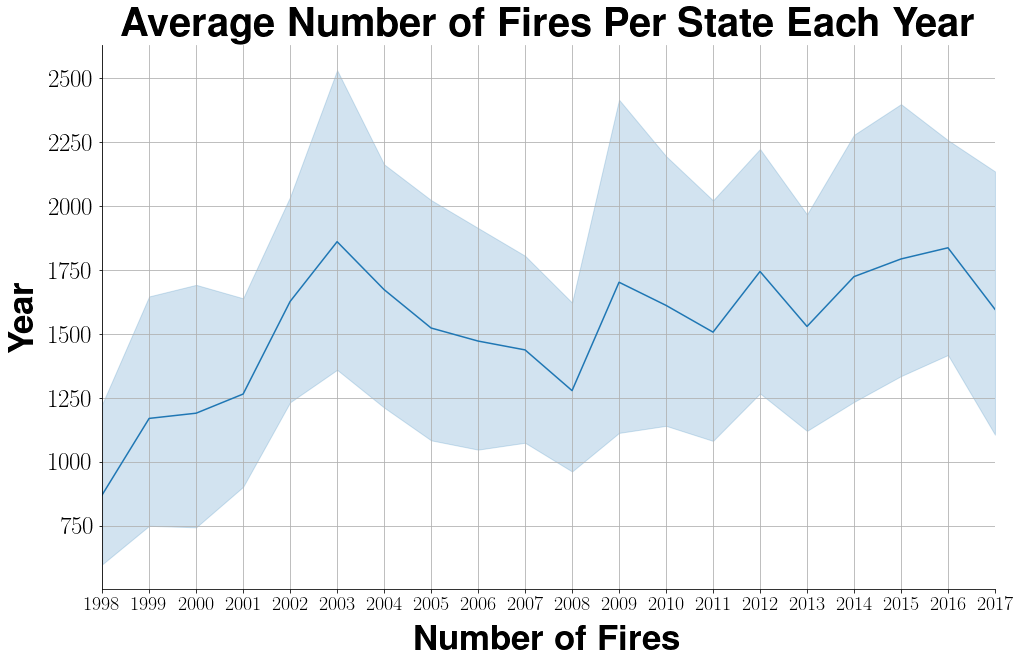

In [12]:
plt.figure(figsize = (16, 10))
plt.grid('on')
state_data = data.groupby(by = ['year','state']).sum().reset_index()
plot = sns.lineplot(data = state_data, x = 'year', y = 'number', markers = True)
plot.xaxis.set_major_locator(plt.MaxNLocator(19))
plt.title(r'\textbf{Average Number of Fires Per State Each Year}', fontsize=40)
plt.ylabel(r'\textbf{Year}', fontsize=35,labelpad=10)
plt.xlabel(r'\textbf{Number of Fires}', fontsize=35,labelpad=10)
plt.xticks(size=20)
plt.yticks(size=25)
plot.set_xlim(1998, 2017)
sns.despine();

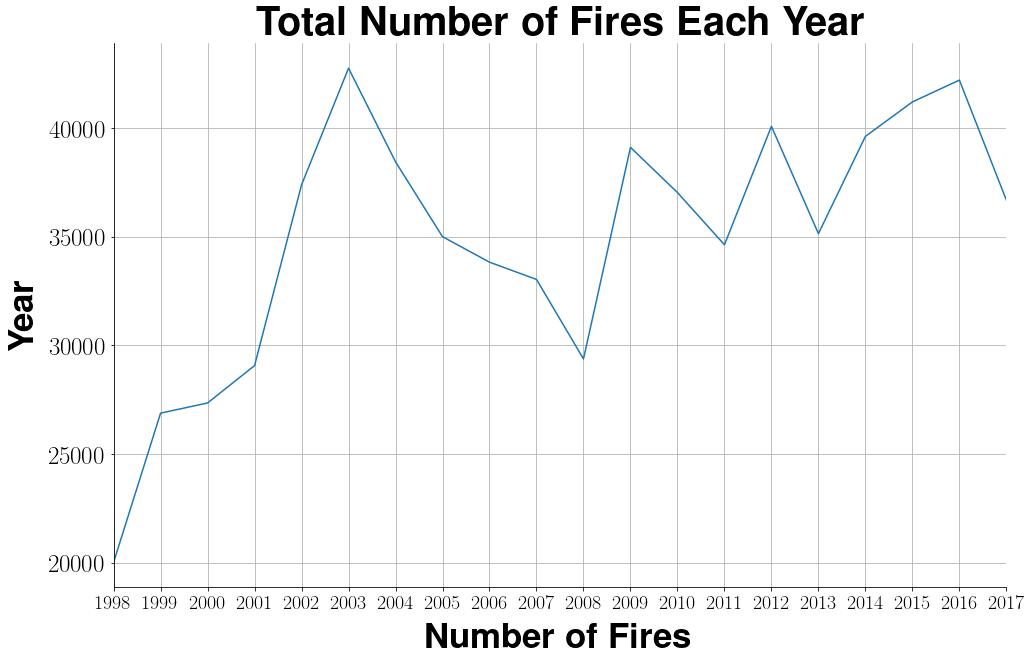

In [13]:
plt.figure(figsize = (16, 10))
plt.grid('on')
year_data = data.groupby(by = ['year']).sum().reset_index()
plot = sns.lineplot(data = year_data, x = 'year', y = 'number', markers = True)
plot.xaxis.set_major_locator(plt.MaxNLocator(19))
plot.set_xlim(1998, 2017)
plt.title(r'\textbf{Total Number of Fires Each Year}', fontsize=40)
plt.ylabel(r'\textbf{Year}', fontsize=35,labelpad=10)
plt.xlabel(r'\textbf{Number of Fires}', fontsize=35,labelpad=10)
plt.xticks(size=20)
plt.yticks(size=25)
sns.despine();

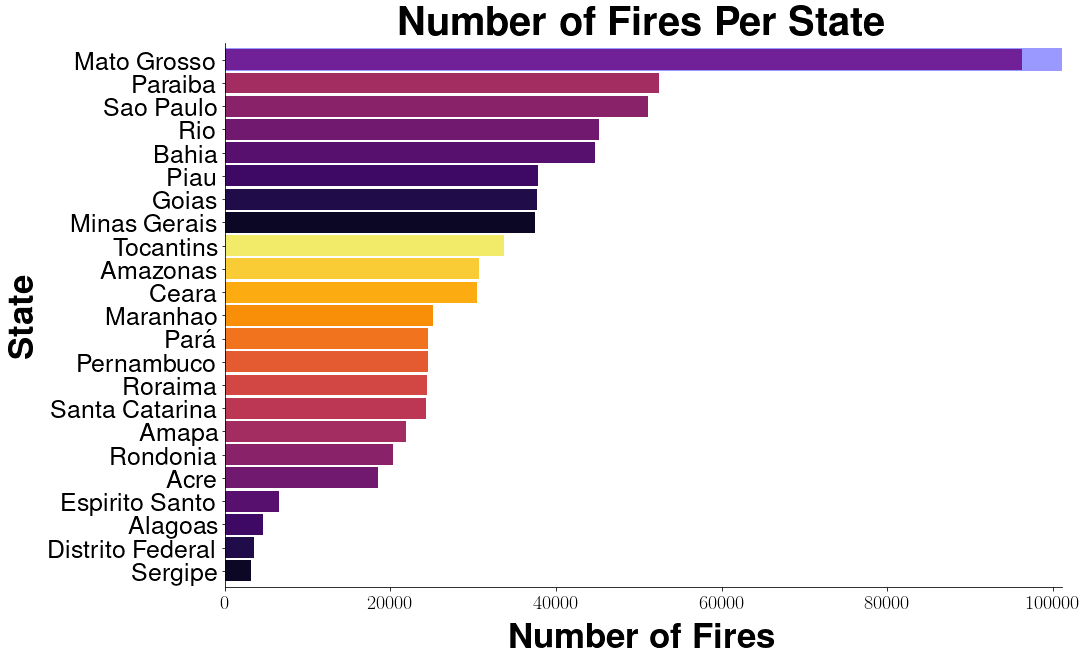

In [15]:
# data
plt.figure(figsize = (15,10))
data[['state','number']].groupby(['state']).number.sum().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('inferno',15))
plt.axhspan(21.5,22.5 ,facecolor='Blue', alpha=0.4) # hilight space
plt.title(r'\textbf{Number of Fires Per State}', fontsize=40)
plt.xlabel(r'\textbf{Number of Fires}', fontsize=35,labelpad=10)
plt.xticks(size=20)
plt.yticks(size=25)
plt.ylabel(r'\textbf{State}', fontsize=35,labelpad=10)
sns.despine();

plt.show()

In [91]:
ani_d1 = data[['year','number']].groupby(['year']).number.sum().reset_index()

In [95]:
from matplotlib.animation import FuncAnimation

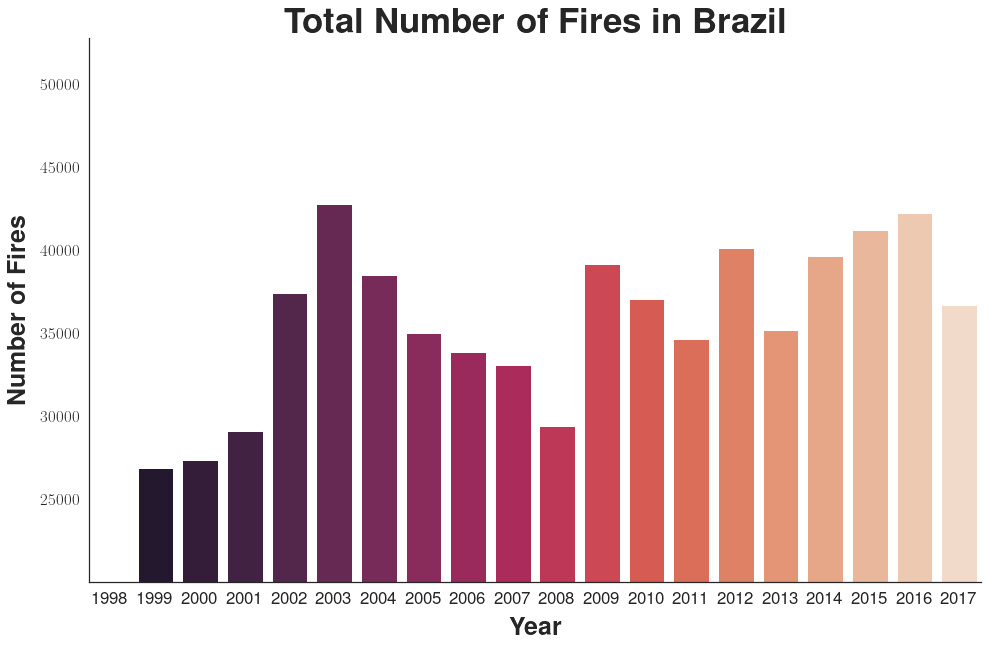

In [117]:
def animate(i):
    data = ani_d1.iloc[:int(i+1)]
    p = sns.barplot(x=data['year'], y=data['number'], data=data, palette="rocket")
    p.tick_params(labelsize=17)
    plt.setp(p.lines,linewidth=4)
    
fig, ax = plt.subplots(figsize=(16,10))
ax.set_xlim()
ax.set_ylim(np.min(ani_d1)[1], np.max(ani_d1)[1] + 10000)
ax.set_title(r'\textbf{Total Number of Fires in Brazil}',fontsize=35)
data = ani_d1.iloc[:int(20+1)]
p = sns.barplot(x=data['year'], y=data['number'], data=data, palette="rocket")
ax.set_xlabel(r'\textbf{Year}',fontsize=25, labelpad=10)
ax.set_ylabel(r'\textbf{Number of Fires}',fontsize=25,labelpad=10)
sns.despine()
p.tick_params(labelsize=17)

Amozonia Legal is the florest Amazon where is in the states: Amazonas, Pará, Roraima, Amapa, Rondonia, Acre, Tocantins, Mato Grosso, Maranhao

In [29]:
data = pd.read_csv('amazon.csv',encoding="ISO-8859-1")
data.head()

year state    month  number        date
0  1998  Acre  Janeiro     0.0  1998-01-01
1  1999  Acre  Janeiro     0.0  1999-01-01
2  2000  Acre  Janeiro     0.0  2000-01-01
3  2001  Acre  Janeiro     0.0  2001-01-01
4  2002  Acre  Janeiro     0.0  2002-01-01

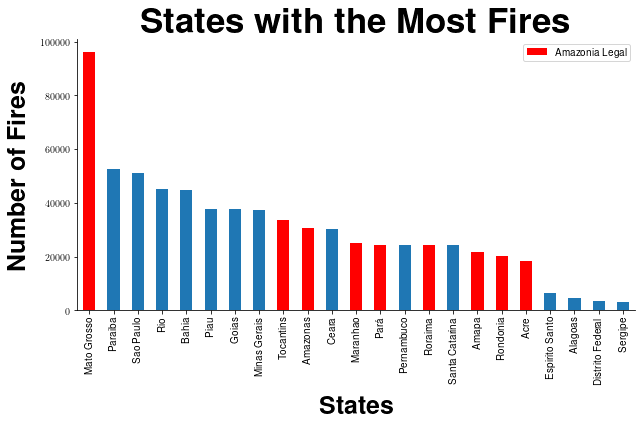

In [25]:
amazonia_legal = ['Amazonas', 'Pará', 'Roraima', 'Amapa', 'Rondonia', 'Acre', 'Tocantins', 'Mato Grosso', 'Maranhao']

estados = data.groupby('state')['number'].sum().sort_values(ascending=False)

ax = plt.gca()
colors = ['C0' if i not in amazonia_legal else 'r' for i in estados.index]
estados.plot(kind='bar',ax=ax,color=colors, figsize=(10, 5))
h,l = ax.get_legend_handles_labels()

ax.set_title(r'\textbf{States with the Most Fires}',fontsize=35)
ax.set_xlabel(r'\textbf{States}',fontsize=25, labelpad=10)
ax.set_ylabel(r'\textbf{Number of Fires}',fontsize=25,labelpad=10)
sns.despine()
ax.legend(["Amazonia Legal", "Other states"], labelspacing=2);

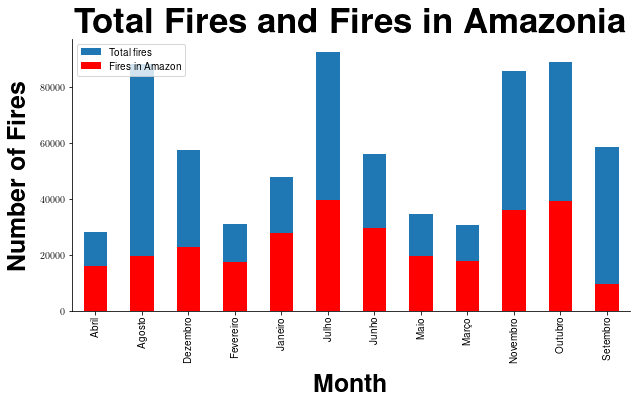

In [27]:
meses_incendio = data.groupby('month')['number'].sum()
meses_incendio_amazonia = data[data.state.isin(amazonia_legal)].groupby('month')['number'].sum()

ax = plt.gca()
meses_incendio.plot(kind='bar',x='month',y='number', ax=ax, stacked=True, figsize=(10, 5))
meses_incendio_amazonia.plot(kind='bar',x='month',y='number', ax=ax, stacked=True, color='r', figsize=(10, 5))
ax.set_title(r'\textbf{Total Fires and Fires in Amazonia}',fontsize=35)

ax.set_xlabel(r'\textbf{Month}',fontsize=25, labelpad=10)
ax.set_ylabel(r'\textbf{Number of Fires}',fontsize=25,labelpad=10)
ax.legend(["Total fires", "Fires in Amazon"])
sns.despine()

# Precipitation

In [31]:
precipitation = pd.read_csv("/Users/matt/Documents/precipitation.csv")
precipitation.head()

state        date  precipitation
0    BA  31/01/1998           63.6
1    BA  28/02/1998           55.6
2    BA  31/03/1998          117.2
3    BA  30/04/1998          206.0
4    BA  31/05/1998          250.9

In [32]:
sigla_estado = {
    "AM" : "Amazonas",
    "PA" : "Pará",
    "RR" : "Roraima",
    "AP" : "Amapa",
    "RO" : "Rondonia",
    "AC" : "Acre",
    "TO" : "Tocantins",
    "MT" : "Mato Grosso",
    "MA" : "Maranhao",
    "AL" : "Alagoas",
    "BA" : "Bahia",
    "CE" : "Ceará",
    "DF" : "Distrito Federal",
    "ES" : "Espírito Santo",
    "GO" : "Goiás",
    "MG" : "Minas Gerais",
    "PB" : "Paraíba",
    "PR" : "Paraná",
    "PE" : "Pernambuco",
    "PI" : "Piauí",
    "RJ" : "Rio",
    "RN" : "Rio Grande do Norte",
    "RS" : "Rio Grande do Sul",
    "SP" : "São Paulo",
    "SE" : "Sergipe",
    "SC" : "Santa Catarina"
}

In [33]:
precipitation['date'] =  pd.to_datetime(precipitation['date'], format='%d/%m/%Y')

precipitation['date'] = precipitation['date'] + pd.Timedelta(days=1)

precipitation['estado'] = precipitation['state'].replace(sigla_estado)

# There isn't data precipitacion in Rondonia
precipitation['estado'].value_counts()

Bahia                  239
Maranhao               239
Minas Gerais           239
Tocantins              239
Pará                   239
Amazonas               239
São Paulo              239
Distrito Federal       239
Goiás                  239
Paraíba                239
Rio Grande do Norte    239
Pernambuco             239
Sergipe                239
Roraima                239
Acre                   239
Amapa                  238
Paraná                 231
Rio Grande do Sul      231
Espírito Santo         230
Ceará                  229
Mato Grosso            228
Piauí                  223
Alagoas                220
Santa Catarina         219
Rio                    180
Name: estado, dtype: int64

In [34]:
precipitation['month'] =  precipitation['date'].dt.month
precipitation['year'] =  precipitation['date'].dt.year
precipitation.head()

state       date  precipitation estado  month  year
0    BA 1998-02-01           63.6  Bahia      2  1998
1    BA 1998-03-01           55.6  Bahia      3  1998
2    BA 1998-04-01          117.2  Bahia      4  1998
3    BA 1998-05-01          206.0  Bahia      5  1998
4    BA 1998-06-01          250.9  Bahia      6  1998

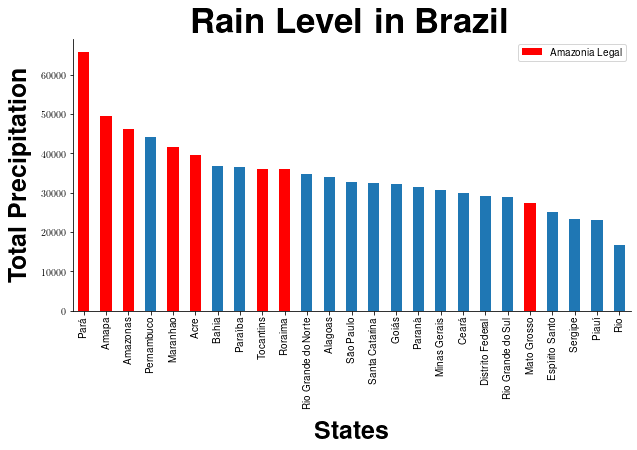

In [37]:
estados_chuva = precipitation.groupby('estado')['precipitation'].sum().sort_values(ascending=False)

ax = plt.gca()
colors = ['C0' if i not in amazonia_legal else 'r' for i in estados_chuva.index]
estados_chuva.plot(kind='bar',ax=ax,color=colors, figsize=(10, 5))
h,l = ax.get_legend_handles_labels()
ax.set_title(r'\textbf{Rain Level in Brazil}',fontsize=35)
ax.set_xlabel(r'\textbf{States}',fontsize=25, labelpad=10)
ax.set_ylabel(r'\textbf{Total Precipitation}',fontsize=25,labelpad=10)
#ax.legend(["Total fires", "Fires in Amazon"])
ax.legend(["Amazonia Legal", "Other states"], labelspacing=2)
sns.despine();

In [39]:
meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

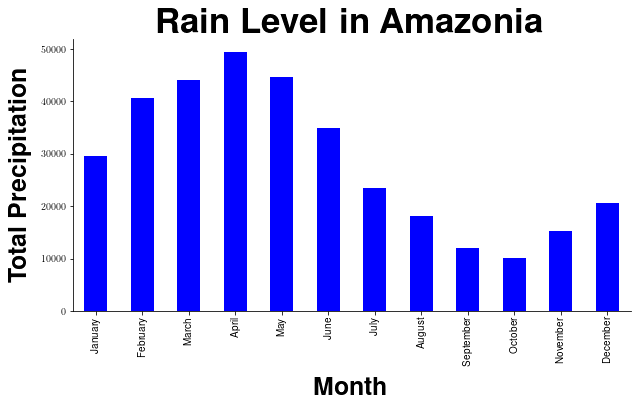

In [40]:
meses_precipitation_amazonia = precipitation[precipitation.estado.isin(amazonia_legal)].groupby('month')['precipitation'].sum()
meses_precipitation_amazonia.index = [meses[i-1] for i in meses_precipitation_amazonia.index]

ax = plt.gca()
meses_precipitation_amazonia.plot(kind='bar',x='month',y='precipitation', ax=ax, stacked=True, color='b', figsize=(10, 5))
ax.set_title(r'\textbf{Rain Level in Amazonia}',fontsize=35)
ax.set_xlabel(r'\textbf{Month}',fontsize=25, labelpad=10)
ax.set_ylabel(r'\textbf{Total Precipitation}',fontsize=25,labelpad=10)
#ax.legend(["Rain level"])
sns.despine()

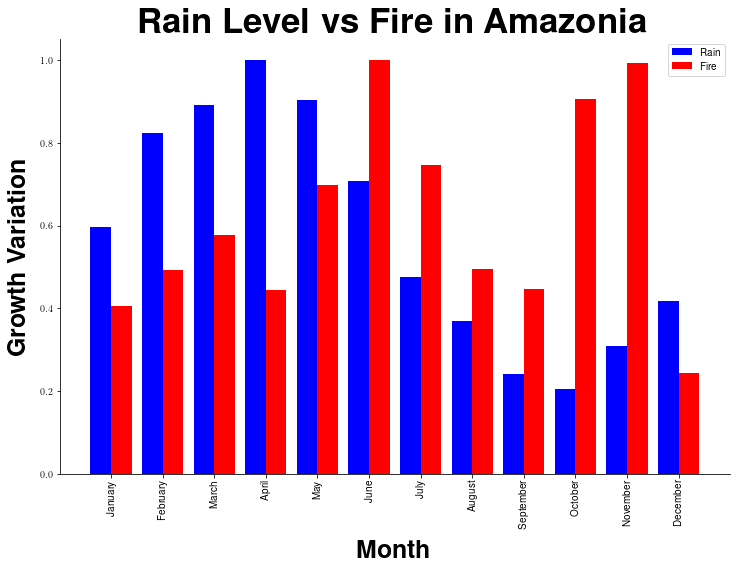

In [43]:
meses_precipitation_amazonia = precipitation[precipitation.estado.isin(amazonia_legal)].groupby('month')['precipitation'].sum()
meses_precipitation_amazonia = meses_precipitation_amazonia / max(meses_precipitation_amazonia)
meses_precipitation_amazonia.index = [meses[i-1] for i in meses_precipitation_amazonia.index]

meses_incendio_amazonia = data[data.state.isin(amazonia_legal)].groupby('month')['number'].sum()
meses_incendio_amazonia = meses_incendio_amazonia / max(meses_incendio_amazonia)

fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(meses_precipitation_amazonia))
bar_width = 0.4
b1 = ax.bar(x, meses_precipitation_amazonia, width=bar_width, color='b', label='Rain')
b2 = ax.bar(x + bar_width, meses_incendio_amazonia, width=bar_width, color='r', label='Fire')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(meses_precipitation_amazonia.index, rotation=90)
ax.legend()
ax.set_title(r'\textbf{Rain Level vs Fire in Amazonia}',fontsize=35)
ax.set_xlabel(r'\textbf{Month}',fontsize=25, labelpad=10)
ax.set_ylabel(r'\textbf{Growth Variation}',fontsize=25,labelpad=10)
sns.despine()